In [3]:
!pip install opencv-python

# Import 

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import pickle

# Select Model

In [5]:
model=keras.models.load_model('model/CNN_cfar10_custom_model.h5')
fig_class=[ "airplane", "automobile","bird","cat","deer", "dog","frog","horse","ship","truck"]

# Evaluate

In [6]:
file_path = 'model/history_custom.pkl'

# Open and load the .pkl file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

In [7]:
loss = data.get('loss', [])
val_loss = data.get('val_loss', [])
accuracy = data.get('accuracy', [])
val_accuracy = data.get('val_accuracy', [])

# Plot

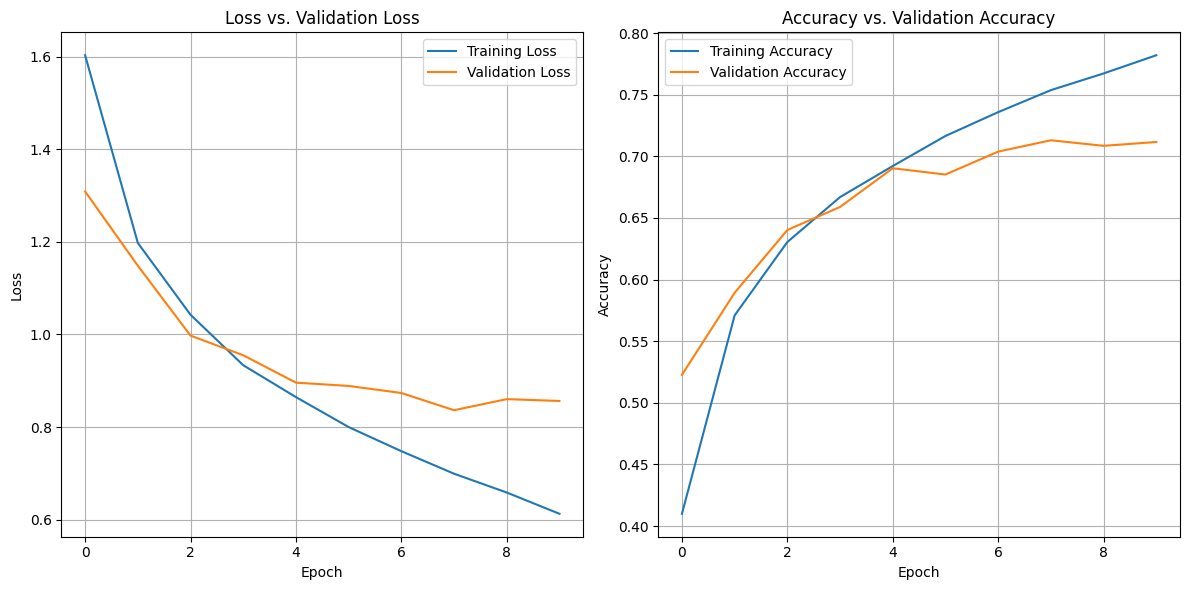

In [8]:
# Plot Loss vs. Validation Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
if val_loss:
    plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Validation Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy vs. Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
if val_accuracy:
    plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Predict Function

In [9]:
def predict_externalImg_classes(image,index):
    #image_resize=image.resize((32,32))
    image_reshape=image.reshape(1,32,32,3)
    image_reshape = image_reshape/255
    predict_image=model.predict(image_reshape,verbose=0)
    prediction_value=int(np.argmax(predict_image,axis=1))
    plt.title(f"Predicted: {fig_class[prediction_value]} || Actual: {fig_class[index]}")
    plt.imshow(image)
    plt.show()

# Predict

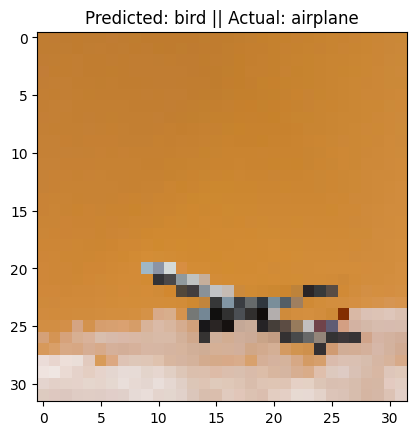

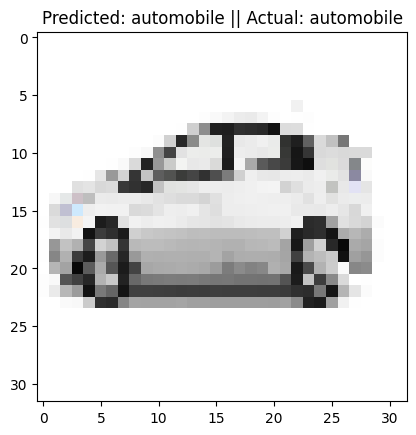

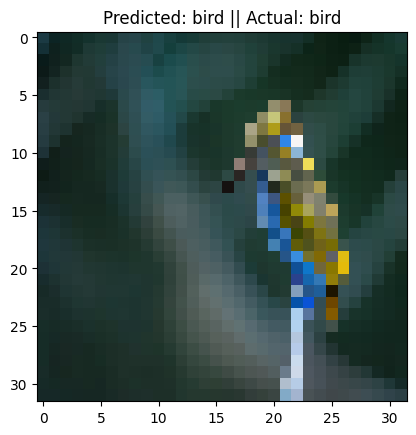

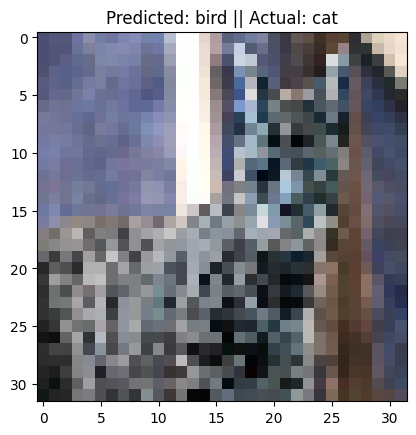

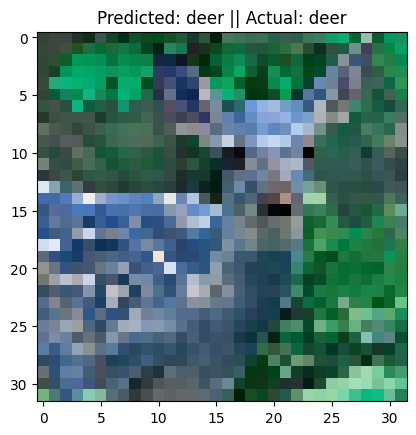

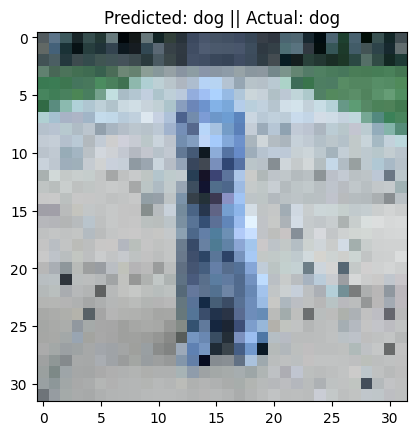

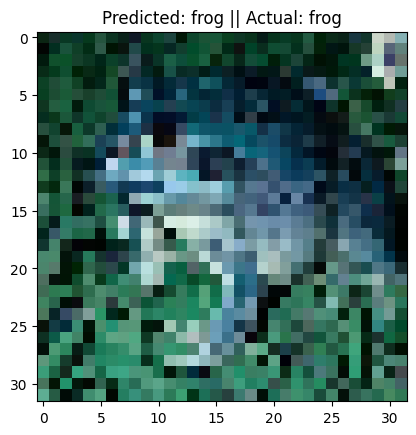

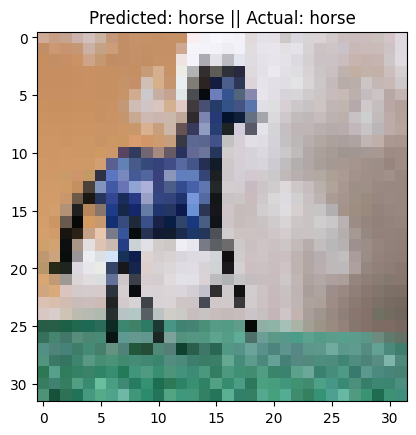

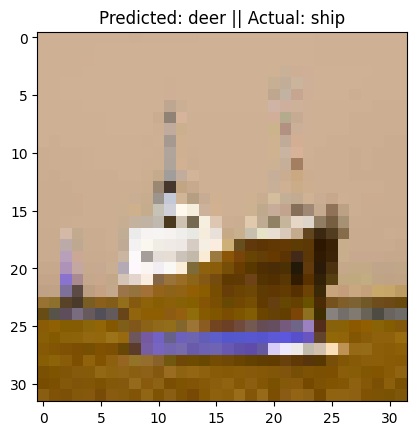

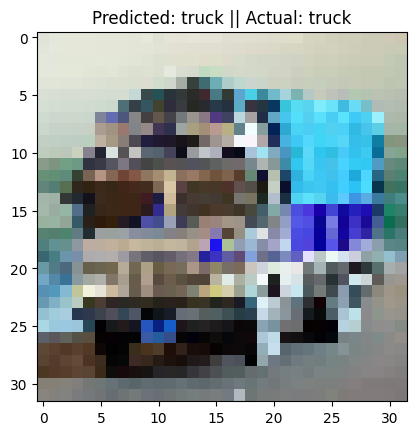

In [10]:
for i in range (0,10):
    image=cv2.imread(rf"photo/{i}.jfif")
    image=cv2.resize(image, (32, 32))
    predict_externalImg_classes(image,i)
